In [38]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

In [2]:
np.random.randint(0, 365, 23)
my_classes = [ np.random.randint(0, 365, 23) for i in range(1000) ]
for a in my_classes:
    u, i = np.unique(a, return_inverse=True)
    u[np.bincount(i) > 1]

In [82]:
def proba_anniversaire_simul(n_promo, n, strict=True, n_tries=10000):
    """Build n_tries arbitrary classes of n_promo size.
    Return the average number of occurences where there are 'n' people having exactly the same birthday.
    """
    classes = [ np.random.randint(0, 365, n_promo) for i in range(n_tries) ]
#    uniques = [ np.unique(a, return_inverse=True) for a in classes ]
#    n_maxes = [ np.amax(np.unique(a, return_counts=True)[1]) ]
    maxes = [ np.amax(np.unique(a, return_counts=True)[1]) for a in classes ]
    if strict:
        occurrences = [ m for m in maxes if m == n ]
    else:
        occurrences = [ m for m in maxes if m >= n ]
    #import pdb;pdb.set_trace()
    #occurrences = [ u[np.bincount(i) == n] for u,i in uniques ]
    #import pdb;pdb.set_trace()
    return len(occurrences) / n_tries

In [381]:
proba_anniversaire_simul(100, 4, True)

0.0614

[2]

In [4]:
# http://mathworld.wolfram.com/BirthdayProblem.html
# https://oeis.org/search?q=A014088+-id:A014088
# https://books.google.fr/books?id=D_XKBQAAQBAJ&pg=PA246&lpg=PA246&dq=Finch+1997+Coincident+Birthdays&source=bl&ots=Ccm2KZwcYC&sig=CFd6Ptyx_PYLOndV_ixN6bYgP2s&hl=fr&sa=X&redir_esc=y#v=onepage&q=Finch%201997%20Coincident%20Birthdays&f=false
# https://archive.lib.msu.edu/crcmath/math/math/b/b248.htm
# https://pdfs.semanticscholar.org/2581/e27916ebe7e34ae52307e4dcf025e5273cf7.pdf
# YEAAAAH (Finch): https://web.archive.org/web/19980113112616/http://www.mathsoft.com:80/mathcad/library/puzzle/soln28/soln28.html
# A Representation for Multinomial Cumulative Distribution Functions
# https://projecteuclid.org/download/pdf_1/euclid.aos/1176345593
import math
fac = math.factorial

def binomial(x, y):
    try:
        binom = fac(x) // fac(y) // fac(x - y)
    except ValueError:
        binom = 0
    return binom

def p_k(n, k, d=365):
    """Greater or equal
    """
    assert k > 1
    accu_i = 0
    for i in range(1, k):
        accu_i += q_k(n, i, d)
    return 1 - accu_i

def q_k(n, k, d=365):
    """Recurrence relation inners
    """
    # Basic cases
    assert k > 0
    if k == 1:
        return math.factorial(d) / (math.factorial(d-n) * (d ** n))

    if k == 2:
        accumulator = 0
        for i in range(2, n//2 + 1):
            accumulator += (1/2**i) * (binomial(d, i) * binomial(d-i, n-2*i))
        return (fac(n) / d**n) * accumulator

    else:
        accu_i = 0
        for i in range(1, n//k + 1):
            nik = n-i*k
            numerator = fac(n) * fac(d)
            denominator = d**(i*k) *\
                fac(i) *\
                (fac(k)**i) *\
                fac(nik) *\
                fac(d-i)
            accu_j = 0
            for j in range(1, k-1+1):
                accu_j += q_k(nik, j, d-i) * \
                    ((d-i)**nik / d**nik)
            accu_i += (numerator / denominator) * accu_j
        return accu_i

def proba_anniversaire_pjg(n, k, strict=True):
    if strict:
        return q_k(n, k)
    else:
        return p_k(n, k)
    # Check input parameters
    assert k <= n

    # Compute part3
    for j in range(1, k-1):
        pass


In [53]:
#p_k(23, 1)
print(p_k(23, 2), p_k(88, 3))
print(q_k(23, 1), q_k(88, 2))

0.5072972343239854 0.5112127204264416
0.4927027656760146 0.4887765597394738


In [316]:
q_k(50, 3)

0.12209952279615405

In [60]:
# http://mathworld.wolfram.com/BirthdayProblem.html
# https://oeis.org/search?q=A014088+-id:A014088
# https://books.google.fr/books?id=D_XKBQAAQBAJ&pg=PA246&lpg=PA246&dq=Finch+1997+Coincident+Birthdays&source=bl&ots=Ccm2KZwcYC&sig=CFd6Ptyx_PYLOndV_ixN6bYgP2s&hl=fr&sa=X&redir_esc=y#v=onepage&q=Finch%201997%20Coincident%20Birthdays&f=false
# https://archive.lib.msu.edu/crcmath/math/math/b/b248.htm
# https://pdfs.semanticscholar.org/2581/e27916ebe7e34ae52307e4dcf025e5273cf7.pdf
# YEAAAAH (Finch): https://web.archive.org/web/19980113112616/http://www.mathsoft.com:80/mathcad/library/puzzle/soln28/soln28.html
# A Representation for Multinomial Cumulative Distribution Functions
# https://projecteuclid.org/download/pdf_1/euclid.aos/1176345593
import math
fac = math.factorial

def binomial(x, y):
    try:
        binom = fac(x) // fac(y) // fac(x - y)
    except ValueError:
        binom = 0
    return binom

def p_k(n, k, d=365):
    """Probability of having *AT LEAST* k people in n having the same birthday.
    """
    assert k > 1
    accu_i = 0
    for i in range(1, k):
        accu_i += q_k(n, i, d)
    return 1 - accu_i

#def b_k(n, k, d=365):
#    """Probability of having *EXACTLY* k people in n having the same birthday.
#    """
#    return p_k(n, k, d) - p_k(n, k+1, d)

def q_k(n, k, d=365):
    """Probability of having *AT MOST EXACTLY* k people in n having the same birthday.
    """
    # Basic cases
    assert k > 0
    if n<k or d<1:
#        print(n, k, d)
        return 0

    if k == 1:
        accu_i = 1
        for i in range(n):
            accu_i *= (1 - i/d)
        return accu_i
#        return math.factorial(d) / (math.factorial(d-n) * (d ** n))

#    if k == 2:
#        accumulator = 0
#        for i in range(2, n//2 + 1):
#            accumulator += (1/2**i) * (binomial(d, i) * binomial(d-i, n-2*i))
#        return (fac(n) / d**n) * accumulator

    else:
        accu_i = 0
        for i in range(1, n//k + 1):
            nik = n - i*k
            if nik <= 0:
                continue
            numerator = fac(n) * fac(d)
            denominator = d**(i*k) *\
                fac(i) *\
                (fac(k)**i) *\
                fac(nik) *\
                fac(d-i)
            accu_j = 0
            for j in range(1, k-1+1):
                accu_j += q_k(nik, j, d-i) * \
                    ((d-i)**nik / d**nik)
            accu_i += (numerator / denominator) * accu_j
        return accu_i

proba_anniversaire_pjg = q_k

In [93]:
# With NO k == 2 block
values = range(0, 400, 10)
ex2 = [ q_k(x, 2) for x in values ] # max of exactly 2 coincident birthdays
al2 = [ p_k(x, 2) for x in values ] # at least 2 coincident birthdays
ex3 = [ q_k(x, 3) for x in values ] # exactly N coincident birthdays
al3 = [ p_k(x, 3) for x in values ] # probability of having at least N coincident birthdays
ex4 = [ q_k(x, 4) for x in values ] # at least N+1 coincident birthdays
al4 = [ p_k(x, 4) for x in values ] # at least N+1 coincident birthdays
#ex5 = [ q_k(x, 5) for x in values ] # exactly N+2 coincident birthdays
#vq_k4 = [ q_k(x, 3) for x in values ] # (max of exactly N coincident birthdays)
#plt.plot(values, ex2, color="blue", label="Exactly 2")
#plt.plot(values, al2, "--", color="blue", label="At least 2")
#plt.plot(values, ex3, color="green", label="Exactly 3")
#plt.plot(values, al3, "--", color="green", label="At least 3")
#plt.plot(values, al4, color="red", label="Exactly 4")
#plt.plot(values, al4, "--", color="red", label="At least 4")
#plt.plot(values, ex5, color="black", label="Exactly 5")
#plt.grid(True)
#plt.legend()


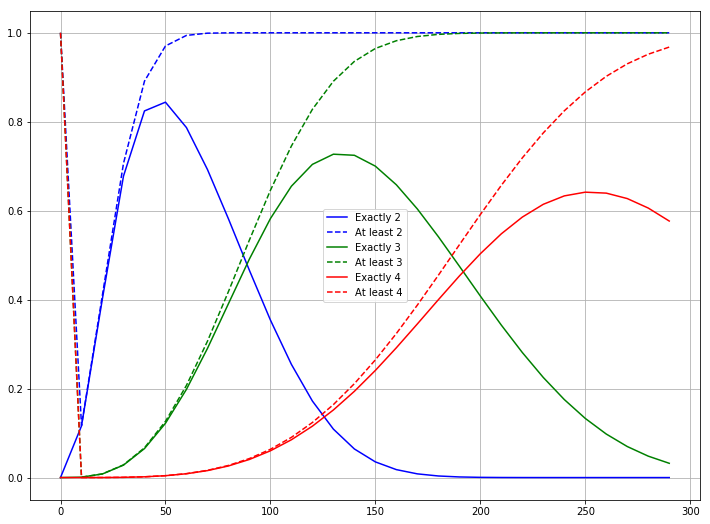

In [62]:
plt.plot(values, ex2, color="blue", label="Exactly 2")
plt.plot(values, al2, "--", color="blue", label="At least 2")
plt.plot(values, ex3, color="green", label="Exactly 3")
plt.plot(values, al3, "--", color="green", label="At least 3")
plt.plot(values, ex4, color="red", label="Exactly 4")
plt.plot(values, al4, "--", color="red", label="At least 4")
#plt.plot(values, ex5, color="black", label="Exactly 5")
plt.grid(True)
plt.legend()


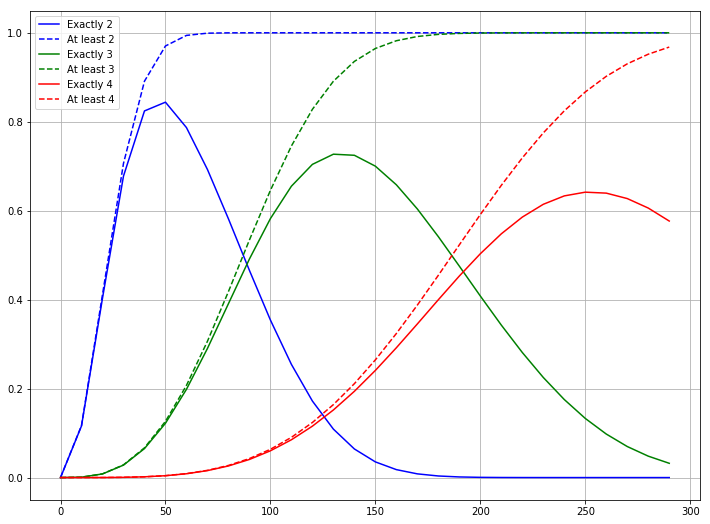

In [321]:
# (figures before fixing >230)
plt.plot(values, ex2, color="blue", label="Exactly 2")
plt.plot(values, al2, "--", color="blue", label="At least 2")
plt.plot(values, ex3, color="green", label="Exactly 3")
plt.plot(values, al3, "--", color="green", label="At least 3")
plt.plot(values, ex4, color="red", label="Exactly 4")
plt.plot(values, al4, "--", color="red", label="At least 4")
#plt.plot(values, ex5, color="black", label="Exactly 5")
plt.grid(True)
plt.legend()


In [80]:
p_k(23, 2)

0.5072972343239854

In [402]:
def proba_anniversaire(n_prommo, n):
    """
    n_promo: Un entier strictement positif, le nombre d'élèves dans la promotion SCIA
    n: Un entier strictement positif,  c'est le nombre exact d'élèves pour lesquels nous
        souhaitons avoir la probabilité qu'ils partagent la même date d'anniversaire.
    """

    def factorial(x):
        """
        Calcule la factoriel de x.
        """
        res = 1
        for i in range(1, x + 1):
            res = res * i
        return res

    def combinaison(k, n):
        """
        Calcule le coefficient binomial k parmis n.
        """
        return factorial(n) / (factorial(k) * factorial(n - k))

    def exponent(x, n):
        """
            Calcule x exposant n.
        """
        res = 1
        for i in range(n):
            res = res * x
        return res


    if n < 2 or n_prommo < 2:
        raise ValueError("You ask me things that have no sense...")

    # if n == 2:
    #     # Dans le cas ou on cherche 2 personne ayant la même date on soustrait à un les chances que tous aient
    #     # une date différente.
    #     proba_all_different = factorial(365)/((exponent(365, n_prommo) * factorial(365 - n_prommo)))
    #     return 1 - proba_all_different
    # Ceci exprime en fait qu'au moins deux étudiant ai la même date d'anniversaire et non exactement 2.

    # La ligne en dessous est l'application de la loi binomiale en resumant le problème à
    # la probabilitée de tirer n fois la même boules au cours de n_promo tirage avec remise,
    # ce qui revient à l'application de la loi binomial.
    # Or en sommant les probabilité proba_anniversaire(366, i) pour i allant de 2 à 366 nous devrions obtenir 1,
    # c'est à dire la certitude que sur 366 élève au moins deux ont une date d'anniversaire en communs le resultat
    # obtenus avec la formule ci-dessous est 0.26 la fomrule paraissant correcte un erreur dans le raisonnement doit
    # etre présente dans la vérification on dans le raisonnement de la résolution...
    return combinaison(n, n_prommo) * exponent(1 / 365, n) * exponent(1 - 1/365, n_prommo - n)


In [405]:
proba_anniversaire(89, 2)

0.02315251232002607

In [170]:
import math
n=23
math.factorial(365) / math.factorial(365-n) * (1 / 365**n)

0.4927027656760147

In [32]:
q_k(210, 4)

1 2 296
1 2 297
1 2 298
1 2 299
1 2 300
1 2 301
1 2 302
1 2 303
1 2 304
1 2 305
1 2 306
1 2 307
1 2 308
1 2 309
1 2 310
1 2 311
1 2 312
2 3 313


0.5480236205536345